<a href="https://colab.research.google.com/github/Eliasmarcet91/CV/blob/main/Image_manipulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install moviepy -q
!pip install opencv-python

In [15]:
#Importing some useful packages
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
import os
import glob
from moviepy.editor import VideoFileClip
from google.colab.patches import cv2_imshow

#Contour

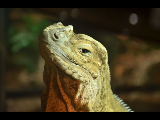

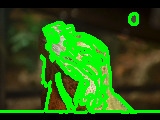

In [61]:
# Load the image
image_path = '/content/GOC_0733.NEF'
image = cv2.imread(image_path)
cv2_imshow(image)

if image is None:
    print(f"Error: Unable to load image at {image_path}")
else:
    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply GaussianBlur to reduce noise and improve contour detection
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)

    # Find edges in the image using Canny edge detector
    edges = cv2.Canny(blurred, 50, 150)

    # Find contours from the edges
    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Draw all contours on the original image
    cv2.drawContours(image, contours, -1, (0, 255, 0), 2)

    # Display the original image with contours using cv2_imshow for Google Colab
    cv2_imshow(image)


#bounding box

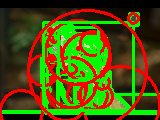

In [39]:
 # Draw bounding boxes and circles around contours
for contour in contours:
    # Bounding rectangle
    x, y, w, h = cv2.boundingRect(contour)
    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

    # Minimum enclosing circle
    (x, y), radius = cv2.minEnclosingCircle(contour)
    center = (int(x), int(y))
    radius = int(radius)
    cv2.circle(image, center, radius, (0, 0, 255), 2)
    # Display the original image with contours, bounding boxes, and circles
cv2_imshow(image)

#Countour and Convex hull


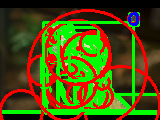

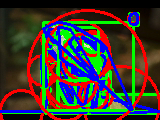

In [48]:
 # Draw bounding boxes and circles around contours
for contour in contours:
    # Bounding rectangle
    x, y, w, h = cv2.boundingRect(contour)
    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

    # Minimum enclosing circle
    (x, y), radius = cv2.minEnclosingCircle(contour)
    center = (int(x), int(y))
    radius = int(radius)
    cv2.circle(image, center, radius, (0, 0, 255), 2)
    #convex hull
    hull = cv2.convexHull(contour)
    cv2.drawContours(image, [hull], -1, (255,0,0),2)
    # Display the original image with contours, bounding boxes, and circles
cv2_imshow(image)

#histogram equalization

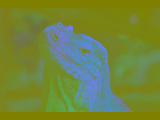

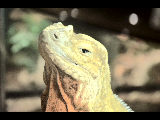

In [59]:
from __future__ import print_function
import cv2 as cv

# Define the path to your image here
image_path = '/content/GOC_0733.NEF'

# Attempt to load the specified image
src = cv.imread(cv.samples.findFile(image_path))
if src is None:
    print('Could not open or find the image:', image_path)
    exit(0)


# Convert the image to YCrCb color space
src_ycrcb = cv.cvtColor(src, cv.COLOR_BGR2YCrCb)

# Split the YCrCb image into its components
Y, Cr, Cb = cv.split(src_ycrcb)

# Perform histogram equalization on the Y channel
Y_eq = cv.equalizeHist(Y)

# Merge the equalized Y channel with the original Cr and Cb channels
dst_ycrcb = cv.merge((Y_eq, Cr, Cb))

# Convert the equalized YCrCb image back to BGR color space
dst = cv.cvtColor(dst_ycrcb, cv.COLOR_YCrCb2BGR)

# Display the original and equalized images
cv2_imshow(src_ycrcb)
cv2_imshow(dst)

cv.waitKey(0)
cv.destroyAllWindows()